# Predicting US Honey Production Through Time Series Analysis

# A. Research Question

For my capstone project I chose the following research question, "Can I accurately predict honey production in the United States based on data from the last 22 years?"

Honey proudction in the United States has been largely impacted by the colony collapse disorder (CCD) phenomenon that began in 2006-2007 (US EPA, 2022). Beekeepers reported losses as high as 90% of their hives and noticed that their colonies suffered a severe and sudden loss of worker bee populations with no observations of dead bees, while queens remained along with abundant honey reserves. 

Currently, the causes of CCD aren't known. However, the Environmental Protection Agency (EPA) is attempting to mitigate CCD and help find ways to increase honey bee populations across the United States (US EPA, 2022). This is incredibly important in supporting local habitats as honey bees are the most populous pollinators in the world. 

To answer this question I used data about honey production in the US from 2000 - 2022. The data is provided for public use by the US Department of Agriculture and includes data for each state for each year. The data includes the following for each state and year, as well at the United States total for that year, which is an important distinction because the yearly US totals do not add up with the summing up of all the state totals due to rounding errors in the data. The following are the columns provided in the datasets; Honey Producing Colonies (thousands), Yield per colony (lbs), Production (1,000 lbs), Stocks Held by Producers (1,000 pounds), Average Price per Pound (dollars), Value of Production (1,000 dollars). 

In using this data to answer my question I am specifically looking at the 'production' column. Based on that column I developed a null and alternative hypothesis listed below:

<b> Null Hypothesis: </b>We cannot predict the production of Honey in the United States within a 95% confidence interval with a 90% accuracy using Mean Absolute Percentage Error.

<b> Alternative Hypothesis: </b>We can predict the production of Honey in the United States within a 95% confidence interval with a 90% accuracy using Mean Absolute Percentage Error.

By using Mean Absolute Percentage Error (Zach, 2021) I can calculate how far off the predictions are on average from established data points. This allows us to conclude how accurate our prediciton will be. If the calculated MAPE is less than 0.10 then the model is within the established 90% range.

Accurately predicting US Honey production for 2023 will allow for forecasting to determine if the US is heading in the correct or wrong direction in the EPA's efforts to mitigate CCD and maintain the population and effectiveness of pollinators in the US.

# B. Data Collection

As stated before, this data is provided by the US Department of Agriculture for public use and is catalogued on the Cornell University library website (USDA Economics, 2023) for download in CSV, PDF, and TXT formats.

Each CSV document catalogs the following data for the year for each state in the US, as well as the US totals: Honey Producing Colonies (thousands), Yield per colony (lbs), Production (1,000 lbs), Stocks Held by Producers (1,000 pounds), Average Price per Pound (dollars), Value of Production (1,000 dollars). 

To complete the time series analysis, it only requires focus on one column, which was the production column. To do this I added a year column for each CSV file so I could filter all the data by year and select the rows with the US production total. I then put that into a new dataframe that had the total US production for each year from 2000 - 2022. I then created a new year column and used the DateTime function in pandas to generate dates that are compatible with ARIMA modeling and other visualization functions used in this python jupyter notebook. Once the new column was created I replaced the index with it so my new dataframe had two columns. The first column being the year in DateTime format (yyyy-dd-mm) and a second column with the total production of honey for the US in that year. 

The large advantage with this dataset is that it is split up by each state. While this report is focused mainly on a time series analysis of US honey production to predict future production, the data being divided by each state could be very useful in future analyses that I will discuss later in this report. This advantange potentially allows for identification of states that are trending in the right direction in regards to honey production.

The large disadvantage with this dataset, especially in regards to time series analysis, is that it provides data in a yearly time step. In this case I am only taking data from 2000 - 2022 so I am only provided with 23 data points with which to run analysis. It would be much better to get quarterly or monthly data for time series analysis. However, in this case this isn't feasible and we must work with what we have. To overcome this disadvantage I made sure to take over 20 years worth of data. While there is no required minimum of data points for running an ARIMA model, it would work better with more data points and most models require at least 50 observations for accurate forecasting (Jebb et al., 2015). 

# C. Data Extraction and Preparation

This report was compiled in Jupyter Notebook on a Python 3 kernel and will be submitted in PDF format. All of the data extraction and analysis, as well as the accompanying code, is provided here in full. I have also provided proper comments and documentation on my code to help provide context for any readers to follow along. 

Tools used are included below:
- pandas for creating dataframes and analytical operations
- NumPy as it is used by other packages
- MatPlotLib for visualizations and utilization by other packages
- scikit-learn for machine learning and calculating MAPE

The advantage for using Python in this analysis is that Python is robust in its features and new packages are constantly developed. It is also the language I am most familiar with and have used for every project in this program, besides the required SQL courses. The disdavantage of using Python in this case is that I could use R in place of it. R is probably a better fit for this project as many of the required packages are better utilized in R requiring less lines of code and process faster.

# C1. Importing Packages and Libraries

In [137]:
# Data Analytics imports
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import re

# Visualization imports
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# Model imports
from sklearn.model_selection import train_test_split
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_percentage_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict

import warnings
warnings.filterwarnings('ignore')

# C2. Importing Data

In [138]:
# Loading CSV Files
honey_2000 = pd.read_csv(r'C:\Users\mmorg\WGU\D214\honey_2000.csv', header=None)
honey_2000.columns = ['state', 'colonies', 'yieldpercolony', 'totalproduction',
                      'lbsofstock', 'avgpriceperlb', 'valueofproduction']

honey_2001 = pd.read_csv(r'C:\Users\mmorg\WGU\D214\honey_2001.csv', header=None)
honey_2001.columns = ['state', 'colonies', 'yieldpercolony', 'totalproduction',
                      'lbsofstock', 'avgpriceperlb', 'valueofproduction']

honey_2002 = pd.read_csv(r'C:\Users\mmorg\WGU\D214\honey_2002.csv', header=None)
honey_2002.columns = ['state', 'colonies', 'yieldpercolony', 'totalproduction',
                      'lbsofstock', 'avgpriceperlb', 'valueofproduction']

honey_2003 = pd.read_csv(r'C:\Users\mmorg\WGU\D214\honey_2003.csv', header=None)
honey_2003.columns = ['state', 'colonies', 'yieldpercolony', 'totalproduction',
                      'lbsofstock', 'avgpriceperlb', 'valueofproduction']

honey_2004 = pd.read_csv(r'C:\Users\mmorg\WGU\D214\honey_2004.csv', header=None)
honey_2004.columns = ['state', 'colonies', 'yieldpercolony', 'totalproduction',
                      'lbsofstock', 'avgpriceperlb', 'valueofproduction']

honey_2005 = pd.read_csv(r'C:\Users\mmorg\WGU\D214\honey_2005.csv', header=None)
honey_2005.columns = ['state', 'colonies', 'yieldpercolony', 'totalproduction',
                      'lbsofstock', 'avgpriceperlb', 'valueofproduction']

honey_2006 = pd.read_csv(r'C:\Users\mmorg\WGU\D214\honey_2006.csv', header=None)
honey_2006.columns = ['state', 'colonies', 'yieldpercolony', 'totalproduction',
                      'lbsofstock', 'avgpriceperlb', 'valueofproduction']

honey_2007 = pd.read_csv(r'C:\Users\mmorg\WGU\D214\honey_2007.csv', header=None)
honey_2007.columns = ['state', 'colonies', 'yieldpercolony', 'totalproduction',
                      'lbsofstock', 'avgpriceperlb', 'valueofproduction']

honey_2008 = pd.read_csv(r'C:\Users\mmorg\WGU\D214\honey_2008.csv', header=None)
honey_2008.columns = ['state', 'colonies', 'yieldpercolony', 'totalproduction',
                      'lbsofstock', 'avgpriceperlb', 'valueofproduction']

honey_2009 = pd.read_csv(r'C:\Users\mmorg\WGU\D214\honey_2009.csv', header=None)
honey_2009.columns = ['state', 'colonies', 'yieldpercolony', 'totalproduction',
                      'lbsofstock', 'avgpriceperlb', 'valueofproduction']

honey_2010 = pd.read_csv(r'C:\Users\mmorg\WGU\D214\honey_2010.csv', header=None)
honey_2010.columns = ['state', 'colonies', 'yieldpercolony', 'totalproduction',
                      'lbsofstock', 'avgpriceperlb', 'valueofproduction']

honey_2011 = pd.read_csv(r'C:\Users\mmorg\WGU\D214\honey_2011.csv', header=None)
honey_2011.columns = ['state', 'colonies', 'yieldpercolony', 'totalproduction',
                      'lbsofstock', 'avgpriceperlb', 'valueofproduction']

honey_2012 = pd.read_csv(r'C:\Users\mmorg\WGU\D214\honey_2012.csv', header=None)
honey_2012.columns = ['state', 'colonies', 'yieldpercolony', 'totalproduction',
                      'lbsofstock', 'avgpriceperlb', 'valueofproduction']

honey_2013 = pd.read_csv(r'C:\Users\mmorg\WGU\D214\honey_2013.csv', header=None)
honey_2013.columns = ['state', 'colonies', 'yieldpercolony', 'totalproduction',
                      'lbsofstock', 'avgpriceperlb', 'valueofproduction']

honey_2014 = pd.read_csv(r'C:\Users\mmorg\WGU\D214\honey_2014.csv', header=None)
honey_2014.columns = ['state', 'colonies', 'yieldpercolony', 'totalproduction',
                      'lbsofstock', 'avgpriceperlb', 'valueofproduction']

honey_2015 = pd.read_csv(r'C:\Users\mmorg\WGU\D214\honey_2015.csv', header=None)
honey_2015.columns = ['state', 'colonies', 'yieldpercolony', 'totalproduction',
                      'lbsofstock', 'avgpriceperlb', 'valueofproduction']

honey_2016 = pd.read_csv(r'C:\Users\mmorg\WGU\D214\honey_2016.csv', header=None)
honey_2016.columns = ['state', 'colonies', 'yieldpercolony', 'totalproduction',
                      'lbsofstock', 'avgpriceperlb', 'valueofproduction']

honey_2017 = pd.read_csv(r'C:\Users\mmorg\WGU\D214\honey_2017.csv', header=None)
honey_2017.columns = ['state', 'colonies', 'yieldpercolony', 'totalproduction',
                      'lbsofstock', 'avgpriceperlb', 'valueofproduction']

honey_2018 = pd.read_csv(r'C:\Users\mmorg\WGU\D214\honey_2018.csv', header=None)
honey_2018.columns = ['state', 'colonies', 'yieldpercolony', 'totalproduction',
                      'lbsofstock', 'avgpriceperlb', 'valueofproduction']

honey_2019 = pd.read_csv(r'C:\Users\mmorg\WGU\D214\honey_2019.csv', header=None)
honey_2019.columns = ['state', 'colonies', 'yieldpercolony', 'totalproduction',
                      'lbsofstock', 'avgpriceperlb', 'valueofproduction']

honey_2020 = pd.read_csv(r'C:\Users\mmorg\WGU\D214\honey_2020.csv', header=None)
honey_2020.columns = ['state', 'colonies', 'yieldpercolony', 'totalproduction',
                      'lbsofstock', 'avgpriceperlb', 'valueofproduction']

honey_2021 = pd.read_csv(r'C:\Users\mmorg\WGU\D214\honey_2021.csv', header=None)
honey_2021.columns = ['state', 'colonies', 'yieldpercolony', 'totalproduction',
                      'lbsofstock', 'avgpriceperlb', 'valueofproduction']

honey_2022 = pd.read_csv(r'C:\Users\mmorg\WGU\D214\honey_2022.csv', header=None)
honey_2022.columns = ['state', 'colonies', 'yieldpercolony', 'totalproduction',
                      'lbsofstock', 'avgpriceperlb', 'valueofproduction']

# C3. Exploratory Data Analysis

In [139]:
honey_2000.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   state              45 non-null     object 
 1   colonies           45 non-null     float64
 2   yieldpercolony     45 non-null     float64
 3   totalproduction    45 non-null     float64
 4   lbsofstock         45 non-null     float64
 5   avgpriceperlb      45 non-null     float64
 6   valueofproduction  45 non-null     float64
dtypes: float64(6), object(1)
memory usage: 2.7+ KB


In [140]:
#Detecting null values
print(honey_2000.isnull().sum())
print(honey_2001.isnull().sum())
print(honey_2002.isnull().sum())
print(honey_2003.isnull().sum())
print(honey_2004.isnull().sum())
print(honey_2005.isnull().sum())
print(honey_2006.isnull().sum())
print(honey_2007.isnull().sum())
print(honey_2008.isnull().sum())
print(honey_2009.isnull().sum())
print(honey_2010.isnull().sum())
print(honey_2011.isnull().sum())
print(honey_2012.isnull().sum())
print(honey_2013.isnull().sum())
print(honey_2014.isnull().sum())
print(honey_2015.isnull().sum())
print(honey_2016.isnull().sum())
print(honey_2017.isnull().sum())
print(honey_2018.isnull().sum())
print(honey_2019.isnull().sum())
print(honey_2020.isnull().sum())
print(honey_2021.isnull().sum())
print(honey_2022.isnull().sum())

state                2
colonies             2
yieldpercolony       2
totalproduction      2
lbsofstock           2
avgpriceperlb        2
valueofproduction    2
dtype: int64
state                2
colonies             2
yieldpercolony       2
totalproduction      2
lbsofstock           2
avgpriceperlb        2
valueofproduction    2
dtype: int64
state                2
colonies             2
yieldpercolony       2
totalproduction      2
lbsofstock           2
avgpriceperlb        2
valueofproduction    2
dtype: int64
state                2
colonies             2
yieldpercolony       2
totalproduction      2
lbsofstock           2
avgpriceperlb        2
valueofproduction    2
dtype: int64
state                2
colonies             2
yieldpercolony       2
totalproduction      2
lbsofstock           2
avgpriceperlb        2
valueofproduction    2
dtype: int64
state                2
colonies             2
yieldpercolony       2
totalproduction      2
lbsofstock           2
avgpriceperlb  

In [141]:
# Drop null rows
honey_2000 = honey_2000.dropna()
honey_2001 = honey_2001.dropna()
honey_2002 = honey_2002.dropna()
honey_2003 = honey_2003.dropna()
honey_2004 = honey_2004.dropna()
honey_2005 = honey_2005.dropna()
honey_2006 = honey_2006.dropna()
honey_2007 = honey_2007.dropna()
honey_2008 = honey_2008.dropna()
honey_2009 = honey_2009.dropna()
honey_2010 = honey_2010.dropna()
honey_2011 = honey_2011.dropna()
honey_2012 = honey_2012.dropna()
honey_2013 = honey_2013.dropna()
honey_2014 = honey_2014.dropna()
honey_2015 = honey_2015.dropna()
honey_2016 = honey_2016.dropna()
honey_2017 = honey_2017.dropna()
honey_2018 = honey_2018.dropna()
honey_2019 = honey_2019.dropna()
honey_2020 = honey_2020.dropna()
honey_2021 = honey_2021.dropna()
honey_2022 = honey_2022.dropna()

In [142]:
#Detecting null values
print(honey_2000.isnull().sum())
print(honey_2001.isnull().sum())
print(honey_2002.isnull().sum())
print(honey_2003.isnull().sum())
print(honey_2004.isnull().sum())
print(honey_2005.isnull().sum())
print(honey_2006.isnull().sum())
print(honey_2007.isnull().sum())
print(honey_2008.isnull().sum())
print(honey_2009.isnull().sum())
print(honey_2010.isnull().sum())
print(honey_2011.isnull().sum())
print(honey_2012.isnull().sum())
print(honey_2013.isnull().sum())
print(honey_2014.isnull().sum())
print(honey_2015.isnull().sum())
print(honey_2016.isnull().sum())
print(honey_2017.isnull().sum())
print(honey_2018.isnull().sum())
print(honey_2019.isnull().sum())
print(honey_2020.isnull().sum())
print(honey_2021.isnull().sum())
print(honey_2022.isnull().sum())

state                0
colonies             0
yieldpercolony       0
totalproduction      0
lbsofstock           0
avgpriceperlb        0
valueofproduction    0
dtype: int64
state                0
colonies             0
yieldpercolony       0
totalproduction      0
lbsofstock           0
avgpriceperlb        0
valueofproduction    0
dtype: int64
state                0
colonies             0
yieldpercolony       0
totalproduction      0
lbsofstock           0
avgpriceperlb        0
valueofproduction    0
dtype: int64
state                0
colonies             0
yieldpercolony       0
totalproduction      0
lbsofstock           0
avgpriceperlb        0
valueofproduction    0
dtype: int64
state                0
colonies             0
yieldpercolony       0
totalproduction      0
lbsofstock           0
avgpriceperlb        0
valueofproduction    0
dtype: int64
state                0
colonies             0
yieldpercolony       0
totalproduction      0
lbsofstock           0
avgpriceperlb  

In [143]:
# Average price per lb was reported as cents from 2001 - 2018 and dollars from 2018 - 2022. 
# Converting 2018 - 2022 dollars to cents
honey_2018["avgpriceperlb"] = honey_2018["avgpriceperlb"]*100
honey_2019["avgpriceperlb"] = honey_2019["avgpriceperlb"]*100
honey_2020["avgpriceperlb"] = honey_2020["avgpriceperlb"]*100
honey_2021["avgpriceperlb"] = honey_2021["avgpriceperlb"]*100
honey_2022["avgpriceperlb"] = honey_2022["avgpriceperlb"]*100

In [144]:
# Adding Year Tags
honey_2000["year"] = "2000"
honey_2001["year"] = "2001"
honey_2002["year"] = "2002"
honey_2003["year"] = "2003"
honey_2004["year"] = "2004"
honey_2005["year"] = "2005"
honey_2006["year"] = "2006"
honey_2007["year"] = "2007"
honey_2008["year"] = "2008"
honey_2009["year"] = "2009"
honey_2010["year"] = "2010"
honey_2011["year"] = "2011"
honey_2012["year"] = "2012"
honey_2013["year"] = "2013"
honey_2014["year"] = "2014"
honey_2015["year"] = "2015"
honey_2016["year"] = "2016"
honey_2017["year"] = "2017"
honey_2018["year"] = "2018"
honey_2019["year"] = "2019"
honey_2020["year"] = "2020"
honey_2021["year"] = "2021"
honey_2022["year"] = "2022"

In [145]:
# Verify year column was added
honey_2000.head(5)

,state,colonies,yieldpercolony,totalproduction,lbsofstock,avgpriceperlb,valueofproduction,year
0,AL,16.0,78.0,1248.0,187.0,59.0,736.0,2000
1,AZ,40.0,59.0,2360.0,1322.0,73.0,1723.0,2000
2,AR,55.0,93.0,5115.0,3529.0,57.0,2916.0,2000
3,CA,440.0,70.0,30800.0,11396.0,59.0,18172.0,2000
4,CO,29.0,60.0,1740.0,957.0,62.0,1079.0,2000


In [146]:
# Compare avgpriceperlb columns
honey_2020.head(5)

,state,colonies,yieldpercolony,totalproduction,lbsofstock,avgpriceperlb,valueofproduction,year
0,Alabama,7.0,39.0,273.0,66.0,543.0,1482.0,2020
1,Arizona,25.0,36.0,900.0,360.0,218.0,1962.0,2020
2,Arkansas,20.0,49.0,980.0,176.0,180.0,1764.0,2020
3,California,320.0,43.0,13760.0,2752.0,178.0,24493.0,2020
4,Colorado,30.0,41.0,1230.0,455.0,209.0,2571.0,2020


In [147]:
# Concatenate all files together
df = pd.concat([honey_2000, honey_2001, honey_2002, 
                honey_2003, honey_2004, honey_2005, 
                honey_2006, honey_2007, honey_2008, 
                honey_2009, honey_2010, honey_2011, 
                honey_2012, honey_2013, honey_2014, 
                honey_2015, honey_2016, honey_2017, 
                honey_2018, honey_2019, honey_2020, 
                honey_2021, honey_2022], axis=0)

In [148]:
df.isnull().sum()

state                0
colonies             0
yieldpercolony       0
totalproduction      0
lbsofstock           0
avgpriceperlb        0
valueofproduction    0
year                 0
dtype: int64

In [149]:
# Verify new DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 984 entries, 0 to 45
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   state              984 non-null    object 
 1   colonies           984 non-null    float64
 2   yieldpercolony     984 non-null    float64
 3   totalproduction    984 non-null    float64
 4   lbsofstock         984 non-null    float64
 5   avgpriceperlb      984 non-null    float64
 6   valueofproduction  984 non-null    float64
 7   year               984 non-null    object 
dtypes: float64(6), object(2)
memory usage: 69.2+ KB


# C4. Data Wrangling

In [150]:
# Look at all state tags
df.state.unique()

array(['AL', 'AZ', 'AR', 'CA', 'CO', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN',
       'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MI', 'MN', 'MS', 'MO', 'MT',
       'NE', 'NV', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA',
       'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY',
       ' Sts 4/ 5/', 'US 5/', 'SC', ' Sts 5/ 6/', 'US 6/', ' Sts 7/ 8/',
       'US 8/ 9/', ' Sts 6/ 7/', 'US 7/ 8/', 'Alabama', 'Arizona',
       'Arkansas', 'California', 'Colorado', 'Florida', 'Georgia',
       'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Louisiana', 'Maine', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'New Jersey',
       'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio',
       'Oregon', 'Pennsylvania', 'South Dakota', 'Tennessee', 'Texas',
       'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia',
       'Wisconsin', 'Wyoming', 'Other States 5/ 6/',
       'United States 6/ 7/', 'Sout

In [151]:
# Count state tags
print(df.state.value_counts())

Pennsylvania    13
Iowa            13
Illinois        13
Idaho           13
Georgia         13
                ..
SC               2
US 7/ 8/         1
 Sts 6/ 7/       1
 Sts 5/ 6/       1
US 6/            1
Name: state, Length: 95, dtype: int64


In [152]:
# Create a dictionary for converting all current state names to correct abbreviations
state_corrections = {'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA', 'Colorado': 'CO', 
                     'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI', 
                   'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS', 'Kentucky': 'KY', 
                   'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 
                     'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 
                     'Nevada': 'NV', 'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY', 
                   'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK', 'Oregon': 'OR', 
                     'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 
                     'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV',
                   'Wisconsin': 'WI', 'Wyoming': 'WY', 'South Carolina': 'SC', 'AL': 'AL', 'AK': 'AK', 
                     'AZ': 'AZ', 'AR': 'AR', 'CA': 'CA', 'CO': 'CO', 
                     'CT': 'CT', 'DE': 'DE', 'FL': 'FL', 'GA': 'GA', 'HI': 'HI', 
                   'ID': 'ID', 'IL': 'IL', 'IN': 'IN', 'IA': 'IA', 'KS': 'KS', 'KY': 'KY', 
                   'LA': 'LA', 'ME': 'ME', 'MD': 'MD', 'MA': 'MA', 'MI': 'MI', 'MN': 'MN', 
                     'MS': 'MS', 'MO': 'MO', 'MT': 'MT', 'NE': 'NE', 
                     'NV': 'NV', 'NJ': 'NJ', 'NM': 'NM', 'NY': 'NY', 
                   'NC': 'NC', 'ND': 'ND', 'OH': 'OH', 'OK': 'OK', 'OR': 'OR', 
                     'PA': 'PA', 'RI': 'RI', 'SD': 'SD', 'TN': 'TN', 'TX': 'TX', 
                     'UT': 'UT', 'VT': 'VT', 'VA': 'VA', 'WA': 'WA', 
                   'WI': 'WI', 'WV': 'WV', 'WY': 'WY', 'SC': 'SC',
                    ' Sts 5/ 6/': 'OS', 'US 6/': 'US', ' Sts 7/ 8/': 'OS',
                   'US 8/ 9/': 'US', ' Sts 6/ 7/': 'OS', 'US 7/ 8/': 'US',
                    'Other States 5/ 6/': 'OS', 'United States 6/ 7/': 'US',
                    ' Sts 4/ 5/': 'OS', 'US 5/': 'US'}
# Assign dictionary to current state column and define it as an object type
df["state"] = df["state"].map(state_corrections)
df["state"] = df["state"].astype('object')


In [153]:
# Verify that .map function worked on state column
df.head(5)

,state,colonies,yieldpercolony,totalproduction,lbsofstock,avgpriceperlb,valueofproduction,year
0,AL,16.0,78.0,1248.0,187.0,59.0,736.0,2000
1,AZ,40.0,59.0,2360.0,1322.0,73.0,1723.0,2000
2,AR,55.0,93.0,5115.0,3529.0,57.0,2916.0,2000
3,CA,440.0,70.0,30800.0,11396.0,59.0,18172.0,2000
4,CO,29.0,60.0,1740.0,957.0,62.0,1079.0,2000


In [154]:
# More verification that state column was converted correctly
df.state.unique()

array(['AL', 'AZ', 'AR', 'CA', 'CO', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN',
       'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MI', 'MN', 'MS', 'MO', 'MT',
       'NE', 'NV', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA',
       'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY', 'OS',
       'US', 'SC'], dtype=object)

In [155]:
# Final verification that state column was converted correctly
print(df.state.value_counts().sort_index())

AL    23
AR    23
AZ    23
CA    23
CO    23
FL    23
GA    23
HI    22
IA    23
ID    23
IL    23
IN    23
KS    23
KY    23
LA    23
MD     4
ME    23
MI    23
MN    23
MO    23
MS    23
MT    23
NC    23
ND    23
NE    23
NJ    23
NM    13
NV    10
NY    23
OH    23
OK     4
OR    23
OS    23
PA    23
SC    11
SD    23
TN    23
TX    23
US    23
UT    23
VA    23
VT    23
WA    23
WI    23
WV    23
WY    23
Name: state, dtype: int64


In [156]:
# Checking for any null values before exporting DataFrame to CSV
df.isnull().sum()

state                0
colonies             0
yieldpercolony       0
totalproduction      0
lbsofstock           0
avgpriceperlb        0
valueofproduction    0
year                 0
dtype: int64

In [157]:
# Convert colonies column to actual value
df["colonies"] = df["colonies"]*1000

In [158]:
# Convert production column to actual value
df["totalproduction"] = df["totalproduction"]*1000

In [159]:
# Convert stock column to actual value
df["lbsofstock"] = df["lbsofstock"]*1000

In [160]:
# Convert value column to actual value
df["valueofproduction"] = df["valueofproduction"]*1000

In [161]:
# Add timestep column
import pandas as pd
df['yearsteps'] = pd.to_datetime(df.year, format='%Y')
df

,state,colonies,yieldpercolony,totalproduction,lbsofstock,avgpriceperlb,valueofproduction,year,yearsteps
0,AL,16000.0,78.0,1248000.0,187000.0,59.0,736000.0,2000,2000-01-01
1,AZ,40000.0,59.0,2360000.0,1322000.0,73.0,1723000.0,2000,2000-01-01
2,AR,55000.0,93.0,5115000.0,3529000.0,57.0,2916000.0,2000,2000-01-01
3,CA,440000.0,70.0,30800000.0,11396000.0,59.0,18172000.0,2000,2000-01-01
4,CO,29000.0,60.0,1740000.0,957000.0,62.0,1079000.0,2000,2000-01-01
...,...,...,...,...,...,...,...,...,...
39,WV,7000.0,39.0,273000.0,98000.0,525.0,1433000.0,2022,2022-01-01
40,WI,53000.0,55.0,2915000.0,816000.0,304.0,8862000.0,2022,2022-01-01
41,WY,30000.0,45.0,1350000.0,230000.0,264.0,3564000.0,2022,2022-01-01
43,OS,53000.0,63.0,3316000.0,501000.0,367.0,12170000.0,2022,2022-01-01


In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 984 entries, 0 to 45
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   state              984 non-null    object        
 1   colonies           984 non-null    float64       
 2   yieldpercolony     984 non-null    float64       
 3   totalproduction    984 non-null    float64       
 4   lbsofstock         984 non-null    float64       
 5   avgpriceperlb      984 non-null    float64       
 6   valueofproduction  984 non-null    float64       
 7   year               984 non-null    object        
 8   yearsteps          984 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 76.9+ KB


In [163]:
# Export cleaned data CleanedHoneyData.CSV
df.to_csv(r'C:\Users\mmorg\WGU\D214\CleanedHoneyData.csv')

# C5. Final Data Preparation for Time Series

In [164]:
df_ts = df.loc[(df['state'] == 'US')]
df_ts = df_ts[['totalproduction', 'yearsteps']]
df_ts

,totalproduction,yearsteps
46,220339000.0,2000-01-01
46,185926000.0,2001-01-01
47,171718000.0,2002-01-01
47,181096000.0,2003-01-01
44,183582000.0,2004-01-01
44,174818000.0,2005-01-01
44,154846000.0,2006-01-01
44,148341000.0,2007-01-01
44,163789000.0,2008-01-01
44,144108000.0,2009-01-01


In [165]:
df_ts = df_ts.rename(columns = {'totalproduction': 'production', 'yearsteps': 'year'})
df_ts

,production,year
46,220339000.0,2000-01-01
46,185926000.0,2001-01-01
47,171718000.0,2002-01-01
47,181096000.0,2003-01-01
44,183582000.0,2004-01-01
44,174818000.0,2005-01-01
44,154846000.0,2006-01-01
44,148341000.0,2007-01-01
44,163789000.0,2008-01-01
44,144108000.0,2009-01-01


In [166]:
df_ts.set_index('year', inplace=True)
df_ts

,production
year,
2000-01-01,220339000.0
2001-01-01,185926000.0
2002-01-01,171718000.0
2003-01-01,181096000.0
2004-01-01,183582000.0
2005-01-01,174818000.0
2006-01-01,154846000.0
2007-01-01,148341000.0
2008-01-01,163789000.0


<function matplotlib.pyplot.show(close=None, block=None)>

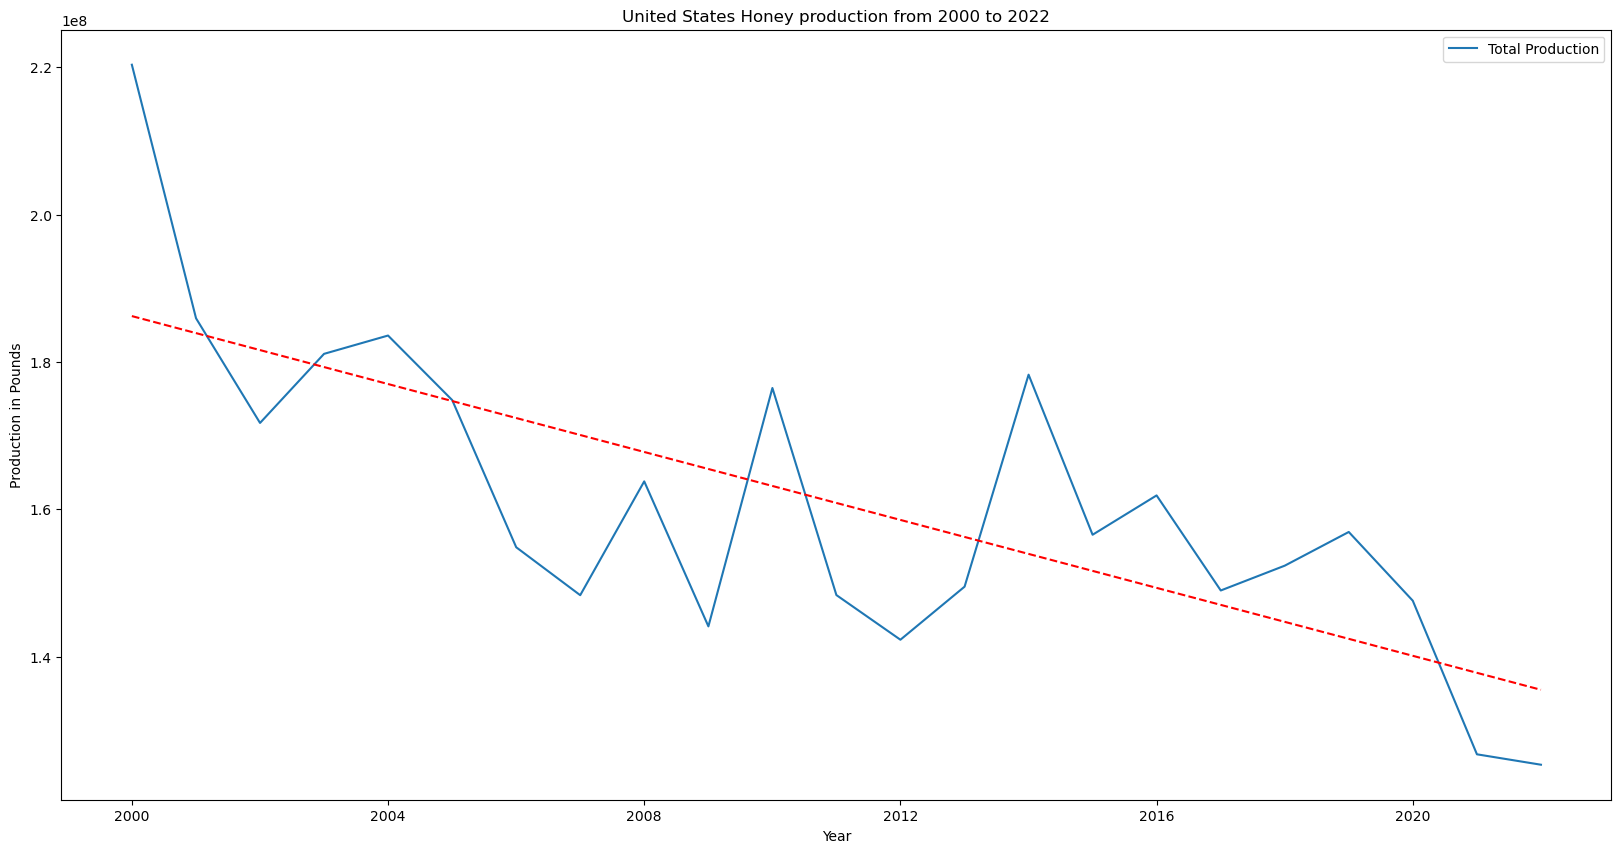

In [168]:
# Adjust graph size for wideness
plt.figure(figsize = [20,10])
# US Yearly Production Chart
plt.xlabel('Year')
plt.ylabel('Production in Pounds')
plt.title('United States Honey production from 2000 to 2022')
# Plot Data
plt.plot(df_ts.production)
plt.plot()
plt.legend(['Total Production'])
# Make Trend Line
x = mdates.date2num(df_ts.index)
y = df_ts.production
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
# Plot trend line
plt.plot(x, p(x), "r--")
plt.show

As I near the finish of data preparation I calculate the trendline of the dataset. It's easy to see that honey production overall has decreased over the time period chosen for this analysis. Though there were two spikes of production in 2010 and 2014, there is a declining trend overall. This is especially apparent in recent years, specifically 2021 and 2022.

Next is to apply a Dickey-Fuller test to determine the order of differencing required for this dataset. That will be included below.

In [169]:
# Running Dickey-Fuller test to check test statistic, p-value, and critical values
result = adfuller(df_ts.production)
print("Test statistics: ", result[0])
print("p-value: ", result[1])
print("Critical values: ", result[4])

Test statistics:  -0.08623009150893284
p-value:  0.950792914847616
Critical values:  {'1%': -4.068853732362312, '5%': -3.1271488757396453, '10%': -2.7017297633136095}


In [170]:
# Evaluating p-value
if result[1]<= 0.05:
    print("Reject null hypothesis, the time series is stationary")
else:
    print("Fail to reject null hypothesis, the time series is non-stationary")

Fail to reject null hypothesis, the time series is non-stationary


The original dataset is non-stationary. I will have to difference it until it loses stationarity and then it will be fit for modeling.

In [179]:
# Use diff() method to take difference of each successive data point, drop new null created in row 1
df_diff = df_ts.diff().dropna()
# Perform augmented Dickey-fuller
aug_adfuller = adfuller(df_diff.production)
# Print new Dickey-fuller results
trans_result = aug_adfuller
print("Test statistics: ", round(trans_result[0], 5))
print("p-value: ", round(trans_result[1], 5))
print("Critical values: ", trans_result[4])

Test statistics:  -0.64888
p-value:  0.85955
Critical values:  {'1%': -4.137829282407408, '5%': -3.1549724074074077, '10%': -2.7144769444444443}


In [180]:
# Evaluating p-value
if trans_result[1]<= 0.05:
    print("Reject null hypothesis, the time series is stationary")
else:
    print("Fail to reject null hypothesis, the time series is non-stationary")

Fail to reject null hypothesis, the time series is non-stationary


In [181]:
# Use 2nd order differencing
df_diff = df_ts.diff().diff().dropna()
# Perform augmented Dickey-fuller
aug_adfuller = adfuller(df_diff.production)
# Print new Dickey-fuller results
trans_result = aug_adfuller
print("Test statistics: ", round(trans_result[0], 5))
print("p-value: ", round(trans_result[1], 5))
print("Critical values: ", trans_result[4])

Test statistics:  -0.05631
p-value:  0.95362
Critical values:  {'1%': -4.137829282407408, '5%': -3.1549724074074077, '10%': -2.7144769444444443}


In [182]:
# Evaluating p-value
if trans_result[1]<= 0.05:
    print("Reject null hypothesis, the time series is stationary")
else:
    print("Fail to reject null hypothesis, the time series is non-stationary")

Fail to reject null hypothesis, the time series is non-stationary


In [183]:
# Use 3rd order differencing
df_diff = df_ts.diff().diff().diff().dropna()
# Perform augmented Dickey-fuller
aug_adfuller = adfuller(df_diff.production)
# Print new Dickey-fuller results
trans_result = aug_adfuller
print("Test statistics: ", round(trans_result[0], 5))
print("p-value: ", round(trans_result[1], 5))
print("Critical values: ", trans_result[4])

Test statistics:  -0.36316
p-value:  0.91607
Critical values:  {'1%': -4.223238279489106, '5%': -3.189368925619835, '10%': -2.729839421487603}


In [184]:
# Evaluating p-value
if trans_result[1]<= 0.05:
    print("Reject null hypothesis, the time series is stationary")
else:
    print("Fail to reject null hypothesis, the time series is non-stationary")

Fail to reject null hypothesis, the time series is non-stationary


In [185]:
# Use 4th order differencing
df_diff = df_ts.diff().diff().diff().diff().dropna()
# Perform augmented Dickey-fuller
aug_adfuller = adfuller(df_diff.production)
# Print new Dickey-fuller results
trans_result = aug_adfuller
print("Test statistics: ", round(trans_result[0], 5))
print("p-value: ", round(trans_result[1], 5))
print("Critical values: ", trans_result[4])

Test statistics:  -4.81789
p-value:  5e-05
Critical values:  {'1%': -4.223238279489106, '5%': -3.189368925619835, '10%': -2.729839421487603}


In [186]:
# Evaluating p-value
if trans_result[1]<= 0.05:
    print("Reject null hypothesis, the time series is stationary")
else:
    print("Fail to reject null hypothesis, the time series is non-stationary")

Reject null hypothesis, the time series is stationary


After differencing the data a 4th time I finally get a p value less than 0.05, and a t-stat less than the critical values. At this point I can stop differencing the data and it is now ready for modeling with a value of 4 for d.

# D. Analysis and Reporting

Before I jump into feeding the data into the ARIMA model, I have to confirm that the data is ready to be forecasted. In the figures below I can confirm that our data lacks seasonality and the trends and residuals are within an acceptable range. I also need to confirm the stationarity of the data.

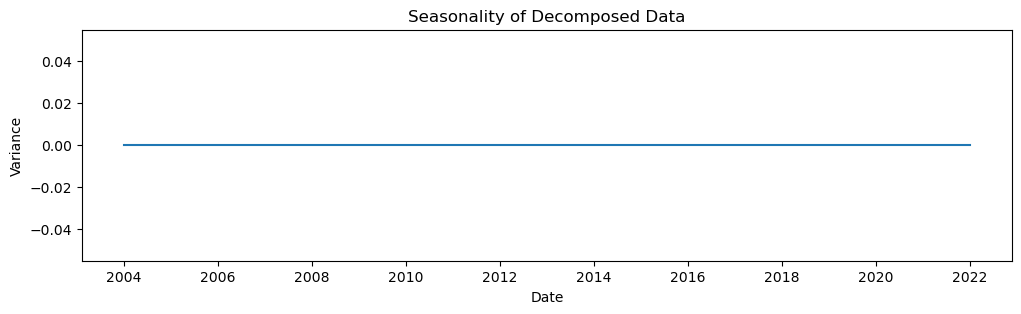

In [187]:
# Confirm lack of seasonality in differenced data
decomp_data = seasonal_decompose(df_diff)
plt.figure(figsize = [12, 3])
plt.title('Seasonality of Decomposed Data')
plt.ylabel('Variance')
plt.xlabel('Date')
plt.plot(decomp_data.seasonal)

This graph above shows that there is no seasonality in the differenced data. I will continue with the decomposed time series below. 

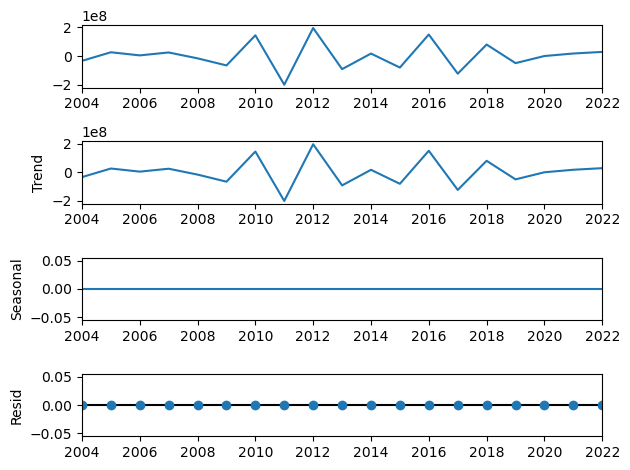

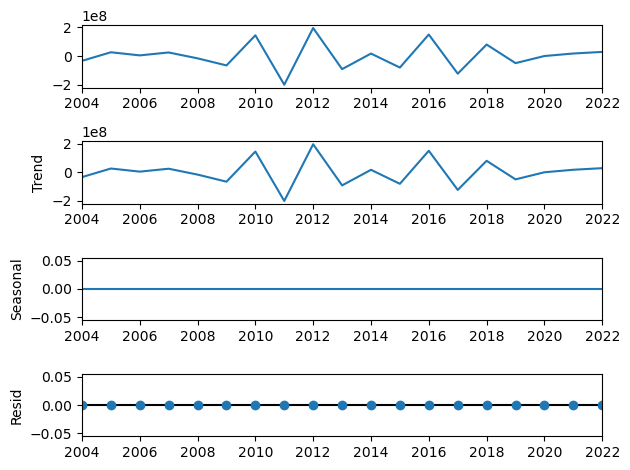

In [188]:
# Creating decomposed time series
decomp_data.plot()

The decomposed time series shows that there are no obvious trends and the residuals are all in line. This shows that we can continue preparing for the ARIMA model. 

Included below is the preparation of data into training and test sets. This is to allow for a plot of the model's predictions against known data points and obtain our MAPE score. This will help me to determine if our model is accurate or not. 

In [189]:
df_ts.shape

(23, 1)

In [190]:
23*.8

18.400000000000002

In [191]:
#Set predictor variables & target variable
X = df_ts[0:18]
y = df_ts[18:23]

# Create 80/20 train/test split from differenced 
train = X
test = y

print("Length of Train Data: ", len(train))
print("Length of Test Data: ", len(test))

Length of Train Data:  18
Length of Test Data:  5


Below is a plot of the training and test data sets so I can visualize the split at 2016. An 80/20 split is the standard for creating train/test splits. This split follows that convention.

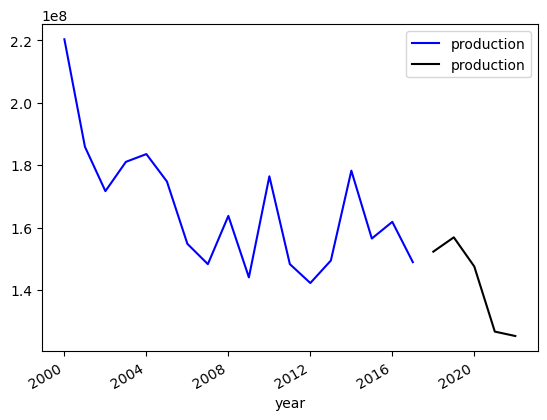

In [192]:
ax = train.plot(color = 'b', x_compat=True)
test.plot(ax = ax, color = 'black')
plt.show()

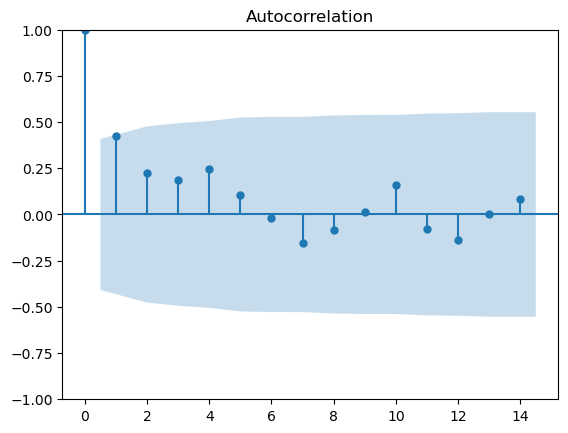

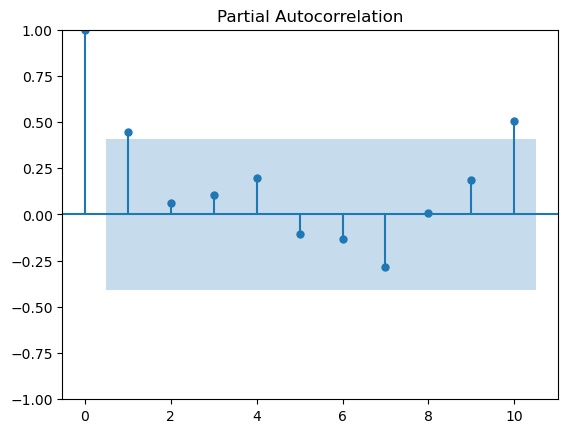

In [193]:
# Autocorrelation plot of df_ts
acf_diff = plot_acf(df_ts)

# Partial Autocorrelation plot of df_ts
pacf_diff = plot_pacf(df_ts, lags=10)

Above is a visualization of the Autocorrelation and Partial Autocorrelation. This helps to determine the p and q values for the ARIMA model. The autocorrelation visualization shows a statistical significance at the first order which means that the q value for the ARIMA model will be 1. The partial autocorrelation visualization shows that there is a statistical significance at the 10th order which means that our p value for the ARIMA model will be 10.

I can now feed the data into the ARIMA model and check the predictions. 

In [194]:
# Run ARIMA model based already established p, d, q values. Notice I use the original dataset with a d value of 4 to reflect
# the order of differencing
model = ARIMA(df_ts, order=(10,4,1))
results = model.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:             production   No. Observations:                   23
Model:                ARIMA(10, 4, 1)   Log Likelihood      -6202171269206.357
Date:                Tue, 25 Jul 2023   AIC                 12404342538436.715
Time:                        15:39:22   BIC                 12404342538448.049
Sample:                    01-01-2000   HQIC                12404342538438.633
                         - 01-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.7870   3.16e-12  -5.65e+11      0.000      -1.787      -1.787
ar.L2         -2.2625   6.68e-12  -3.39e+11      0.000      -2.262      -2.262
ar.L3         -2.3600   1.16e-11  -2.03e+11      0.0

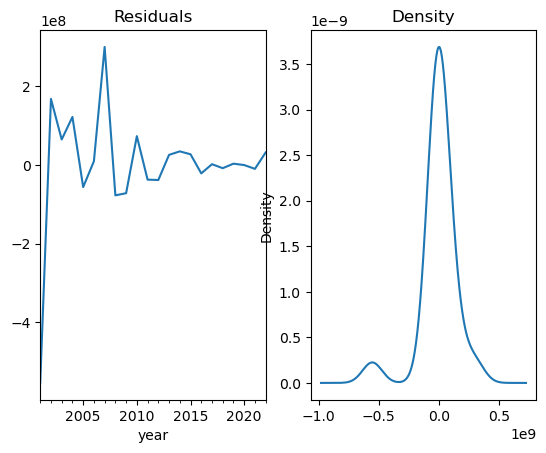

In [195]:
# Plot residuals and density
residuals = results.resid[1:]
fig, ax = plt.subplots(1,2)
residuals.plot(title='Residuals', ax=ax[0])
residuals.plot(title='Density', kind='kde', ax=ax[1])
plt.show()

After running the data through the ARIMA model we can visualize the results by checking the residuals and density. In the residuals plot we are looking for a graph that looks like "white noise". Because of the limited amount of data points present in the dataset, this is the closest thing to "white noise" we can hope for. In the density plot we want evenly distributed data with a mean of 0. Our plot is very close to that. We can now move on to comparing our predicitons to the original data.

In [196]:
forecast = results.predict()
print(forecast)

2000-01-01    0.000000e+00
2001-01-01    7.392819e+08
2002-01-01    4.359329e+06
2003-01-01    1.167500e+08
2004-01-01    6.199998e+07
2005-01-01    2.312675e+08
2006-01-01    1.457430e+08
2007-01-01   -1.509455e+08
2008-01-01    2.411808e+08
2009-01-01    2.160330e+08
2010-01-01    1.035532e+08
2011-01-01    1.858586e+08
2012-01-01    1.807461e+08
2013-01-01    1.241104e+08
2014-01-01    1.440129e+08
2015-01-01    1.296389e+08
2016-01-01    1.835003e+08
2017-01-01    1.473051e+08
2018-01-01    1.607767e+08
2019-01-01    1.539016e+08
2020-01-01    1.480883e+08
2021-01-01    1.368950e+08
2022-01-01    9.375593e+07
Freq: AS-JAN, Name: predicted_mean, dtype: float64


In [197]:
print(test)

             production
year                   
2018-01-01  152348000.0
2019-01-01  156922000.0
2020-01-01  147594000.0
2021-01-01  126744000.0
2022-01-01  125331000.0


In [198]:
forecast.shape

(23,)

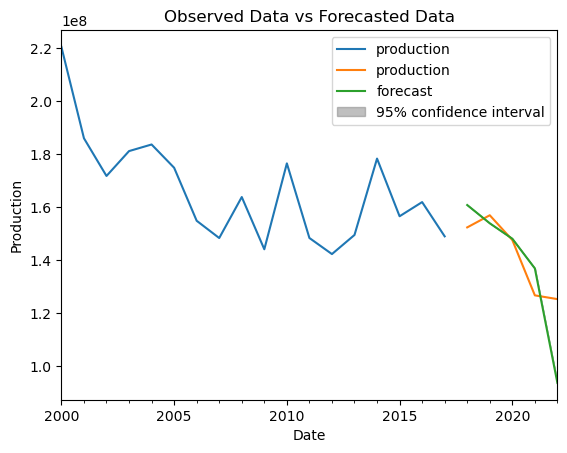

In [199]:
# Observed Data vs Forecasted Data
fig, ax = plt.subplots()
train.plot(ax=ax)
test.plot(ax=ax)
plot_predict(results, '2018-01-01', '2022-01-01', ax=ax)
plt.ylabel('Production')
plt.xlabel('Date')
plt.title('Observed Data vs Forecasted Data')
plt.show()

Above is a graph showing the predicted results against the original data. It is shown that the predicted values have the same trend as the original data though it's not perfect. I will evaluate the predictions below using mean absolute percentage error (MAPE). The alternative hypothesis was that I could make predictions with a MAPE less than 10%. 

In [200]:
start_index = '2023-01-01'
end_index = '2023-01-01'
futureforecast = results.predict(start=start_index, end=end_index)
print(forecast)
print(futureforecast)

2000-01-01    0.000000e+00
2001-01-01    7.392819e+08
2002-01-01    4.359329e+06
2003-01-01    1.167500e+08
2004-01-01    6.199998e+07
2005-01-01    2.312675e+08
2006-01-01    1.457430e+08
2007-01-01   -1.509455e+08
2008-01-01    2.411808e+08
2009-01-01    2.160330e+08
2010-01-01    1.035532e+08
2011-01-01    1.858586e+08
2012-01-01    1.807461e+08
2013-01-01    1.241104e+08
2014-01-01    1.440129e+08
2015-01-01    1.296389e+08
2016-01-01    1.835003e+08
2017-01-01    1.473051e+08
2018-01-01    1.607767e+08
2019-01-01    1.539016e+08
2020-01-01    1.480883e+08
2021-01-01    1.368950e+08
2022-01-01    9.375593e+07
Freq: AS-JAN, Name: predicted_mean, dtype: float64
2023-01-01    1.407250e+08
Freq: AS-JAN, dtype: float64


In [201]:
df_predict = pd.concat([forecast, futureforecast], axis=0)
df_predict

2000-01-01    0.000000e+00
2001-01-01    7.392819e+08
2002-01-01    4.359329e+06
2003-01-01    1.167500e+08
2004-01-01    6.199998e+07
2005-01-01    2.312675e+08
2006-01-01    1.457430e+08
2007-01-01   -1.509455e+08
2008-01-01    2.411808e+08
2009-01-01    2.160330e+08
2010-01-01    1.035532e+08
2011-01-01    1.858586e+08
2012-01-01    1.807461e+08
2013-01-01    1.241104e+08
2014-01-01    1.440129e+08
2015-01-01    1.296389e+08
2016-01-01    1.835003e+08
2017-01-01    1.473051e+08
2018-01-01    1.607767e+08
2019-01-01    1.539016e+08
2020-01-01    1.480883e+08
2021-01-01    1.368950e+08
2022-01-01    9.375593e+07
2023-01-01    1.407250e+08
Freq: AS-JAN, dtype: float64

In [202]:
df_predict = df_predict.reset_index()

In [203]:
df_predict.columns = ['year', 'production']
df_predict.set_index('year', inplace=True)

In [204]:
pred_train = df_predict[0:19]
pred_test = df_predict[18:23]

mape = round(mean_absolute_percentage_error(test, pred_test), 3)
print(f"The mean absolute percentage error of this forecast is {mape}.")

The mean absolute percentage error of this forecast is 0.082.


When comparing the predicted results to the datasets known results and calculting MAPE I find that the model is within the range of 10% with an actual percentage error of 8.2%. This means that the model is able to predict honey production over this time period within a range of 8.2% accuracy. 

Based on the forecast this model predicts that US Honey Production in 2023 will be within 8.2% of 140,725,000 pounds.

This analysis technique was chosen due to the nature of the data. The values for p, d, q in the ARIMA model were chosen based on findings during the data exploration phase. Following the steps appropriately lead to a model with high accuracy. The advantage here is that when data is standardized and trends and seasonality are removed from the data, it can produce effective models for forecasting and making predicitons.

The disadvantage of this analysis technique is that it requires data to be differenced, and that can introduce a number of problems. Differencing data can reduce the content of information in the dataset and it can cause problems with hypothesis testing as it may not follow a normal distribution curve. I also settled on using MAPE as the way to test accuracy. However, there is no standard on what a good MAPE score is. In this case, I determined in the hypotheses that being within 10% of the observed data points was an appropriate level of accuracy. For this report and model, this qualifies as good. Another way to check this would be using auto ARIMA and comparing the MAPE scores of the different models produced. 

# E. Summary and Implications

This capstone was focused on the following hypotheses: 

<b> Null Hypothesis: </b>We cannot predict the production of Honey in the United States within a 95% confidence interval with a 90% accuracy using Mean Absolute Percentage Error.

<b> Alternative Hypothesis: </b>We can predict the production of Honey in the United States within a 95% confidence interval with a 90% accuracy using Mean Absolute Percentage Error.

Through data exploration and manipulation I was able to show that after differencing the data we could prove our alternate hypothesis. I believe the final ARIMA model and forecast included in this report shows that I was able to produce a series of forecasts that achieved a MAPE score of 8.2%. This is lower than the 10% threshold set in the null and alternative hypotheses.

Based on these results I feel confident in rejecting the null hypothesis and accepting the alternative hypothesis showing that this dataset can allow us to create an effective time series model for predicting US honey production.

While we can consider the model a success there are a few limitations to this analysis that must be acknowledged. This analysis was based on a limited number of datapoints. With more datapoints, whether that's including more years, or having quarterly data, this model could potentially be even more accurate in its ability to forecast future production.

This drop in production is a worrying trend and leads into talking about the implications of this report. As discussed earlier, honey production in the United States is important due to its relation to colony collapse disorder. This has had a huge impact on honey production, but also has a ripple effect on the economy and our environment. Honeybees are the largest population of pollinators in the world. The health of our economy and environment is directly dependent on the health of honeybee colonies. The amount of honey they produce is indicative of the health of these colonies and their populations. As shown, honey production has drastically decreased in recent years while my model predicts that it will continue to decline. 

Based on the results of my model it shows that honey production will continue to decrease. The next step, which will be included in my presentation, is to look at states that are bucking this trend and increasing their production in recent years. If we can identify states that are improving their honey production, and therefore improving the health of their honeybee populations, these states can be used as examples for reversing the trend of colony collapse disorder. After identifying these states a study can be recommended that will look at the characteristics of those states or what policies they have enacted that are promoting the health of their honeybee population. If these variables can be identified then a plan can be put in place to replicate those conditions elsewhere and mitigate the effects of CCD.

Another approach into further study of this dataset is to look at included data regarding production of different types of honey. The data can be analyzed to see if specific types of honey are maintaining or increasing production over this time period and aren't effected by CCD as much as others. If these types of honey can be identified then that data can be used to immediately start looking into what flora produces that honey. The goal would be to hopefully identify conditions that those flowers are experiencing and attempt to replicate them elsewhere or there could be an attempt to spread those species of flower further and attempt to increase production of that type of honey elsewhere. If there is a particular type of honey that is outperforming the others, then that could lead to finding a more stable source of pollination for honeybees. 

# F. Sources and Citations

“Colony Collapse Disorder | US EPA.” US EPA, 26 Oct. 2022, www.epa.gov/pollinator-protection/colony-collapse-disorder.

USDA Economics, Statistics and Market Information System. usda.library.cornell.edu/concern/publications/hd76s004z?locale=en.

Jebb, Andrew T., et al. “Time Series Analysis for Psychological Research: Examining and Forecasting Change.” Frontiers in Psychology, vol. 6, Frontiers Media, June 2015, doi:10.3389/fpsyg.2015.00727.

Zach. “How to Calculate Mean Absolute Percentage Error (MAPE) in Excel.” Statology, May 2021, www.statology.org/mape-excel.